In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
import numpy as np
import matplotlib.pyplot as plt

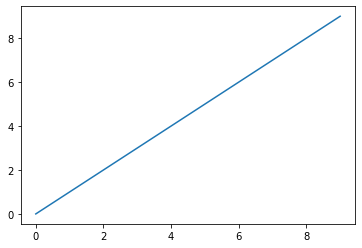

In [8]:
plt.plot(range(10))

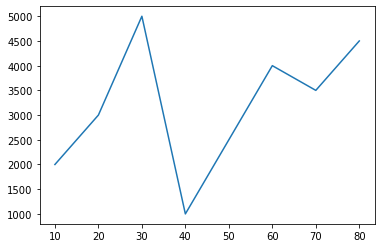

In [9]:
data_x = [10,20,30,40,50,60,70,80]
data_y = [2000,3000,5000,1000,2500,4000,3500,4500]
plt.plot(data_x,data_y)
plt.show()

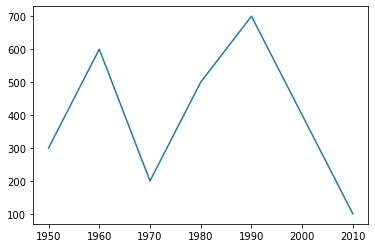

In [11]:
years = [1950,1960,1970,1980,1990,2000,2010]
gdp = [300.2,600.2,200.2,500.2,700.2,400.2,100.2]
plt.plot(years,gdp)
plt.show()

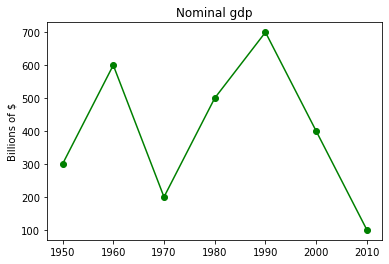

In [15]:
years = [1950,1960,1970,1980,1990,2000,2010]
gdp = [300.2,600.2,200.2,500.2,700.2,400.2,100.2]
plt.plot(years,gdp,color='green',marker='o',linestyle='solid')
plt.title("Nominal gdp")
plt.ylabel("Billions of $")
plt.show()

In [17]:
a = np.array([1,2,3])

In [20]:
print(a)

[1 2 3]


In [22]:
np.arange(0,6,2)

array([0, 2, 4])

In [23]:
fashion_mnist = keras.datasets.fashion_mnist

In [24]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [26]:
train_images.shape

(60000, 28, 28)

In [27]:
len(train_labels)

60000

In [28]:
test_images.shape

(10000, 28, 28)

In [29]:
len(test_labels)

10000

In [74]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [31]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [32]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

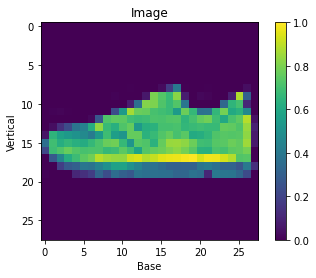

In [75]:
plt.figure()
plt.imshow(train_images[4154])
plt.title("Image")
plt.ylabel("Vertical")
plt.xlabel("Base")
plt.colorbar()
plt.grid(False)
plt.show()

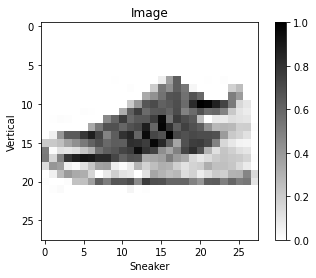

In [78]:
plt.figure()
plt.imshow(train_images[4454],cmap=plt.cm.binary)
plt.title("Image")
plt.ylabel("Vertical")
plt.xlabel(class_names[train_labels[4454]])
plt.colorbar()
plt.grid(False)
plt.show()

In [61]:
train_images = train_images/255.0
test_images = test_images/255.0

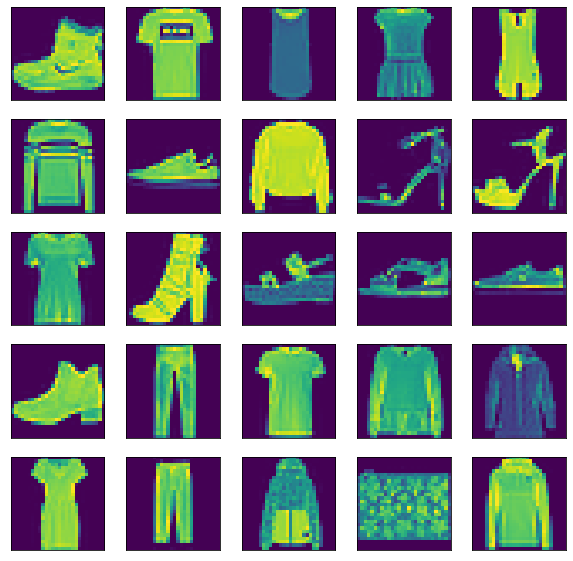

In [62]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
plt.show()

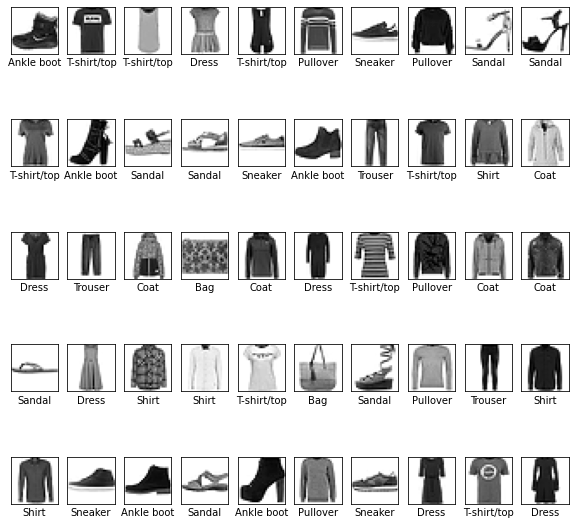

In [95]:
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [96]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [97]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [101]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 10s 175us/sample - loss: 0.4938 - acc: 0.8252
Epoch 2/10
60000/60000 [==============================] - 10s 167us/sample - loss: 0.3739 - acc: 0.8651
Epoch 3/10
60000/60000 [==============================] - 8s 135us/sample - loss: 0.3360 - acc: 0.8784
Epoch 4/10
60000/60000 [==============================] - 9s 153us/sample - loss: 0.3136 - acc: 0.8851
Epoch 5/10
60000/60000 [==============================] - 8s 138us/sample - loss: 0.2957 - acc: 0.8924
Epoch 6/10
60000/60000 [==============================] - 9s 155us/sample - loss: 0.2810 - acc: 0.8966
Epoch 7/10
60000/60000 [==============================] - 9s 144us/sample - loss: 0.2682 - acc: 0.9006
Epoch 8/10
60000/60000 [==============================] - 8s 139us/sample - loss: 0.2589 - acc: 0.9044
Epoch 9/10
60000/60000 [==============================] - 10s 163us/sample - loss: 0.2498 - acc: 0.9082
Epoch 10/10
60000/60000 [==============================] - 7s 121us/sa

In [102]:
test_loss,test_acc = model.evaluate(test_images,test_labels)
print("Test Accuracy:",test_acc)

10000/10000 [==============================] - 1s 96us/sample - loss: 0.3404 - acc: 0.8821
Test Accuracy: 0.8821


In [103]:
predictions = model.predict(test_images)

In [110]:
predictions[7]

array([2.7789763e-05, 1.3067181e-08, 7.3204131e-04, 2.7009498e-06,
       1.2396439e-02, 4.0996273e-08, 9.8684084e-01, 7.6261997e-11,
       5.8968237e-08, 4.0201606e-10], dtype=float32)

In [111]:
np.argmax(predictions[7])

6

Item type: T-shirt/top


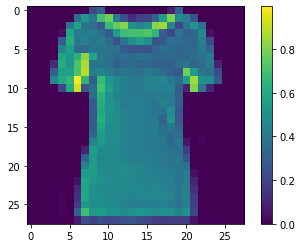

In [121]:
plt.figure()
imgno = 4545
plt.imshow(test_images[imgno])
k = np.argmax(predictions[imgno])
print("Item type:",class_names[k])
plt.colorbar()
plt.grid(False)
plt.show()

Item no.13 is: Sneaker


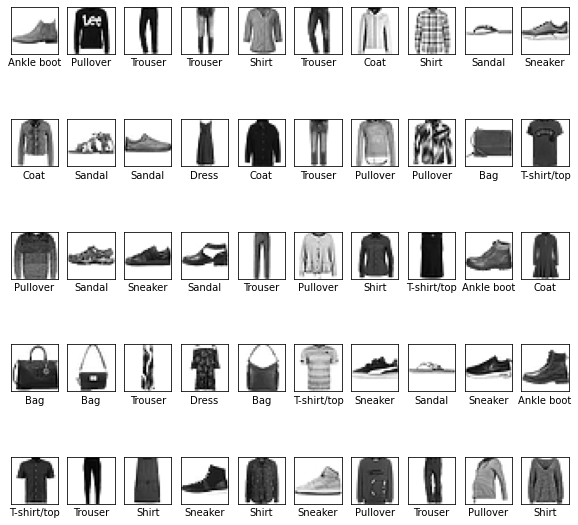

In [135]:
print("Item no.13 is:",class_names[test_labels[12]])
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i],cmap=plt.cm.binary)
    k = np.argmax(predictions[i])
    plt.xlabel(class_names[k])
#     plt.xlabel(class_names[k])
#     plt.xlabel(class_names[test_labels[i]])
plt.show()